In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

In [9]:
import pandas as pd
import numpy as np
import sys      # 최대정수를 가져오기 위해 import
from tensorflow.keras.utils import to_categorical # to_categorical() : 분류분석시 y 데이터 원핫인코딩  # from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential #모델 생성
from tensorflow.keras.layers import Dense,Input
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split  # 데이터 분리

# 이진분류(로지스틱 회귀분석)
- 1. 대이터셋 생성 & 전처리
  * 엑셀 -> 데이터프레임  -> 처리(결측치로 전환하여 결측치처리) -> X,y 분리
   -> X변수의 scale 조정 -> train_test_split() 이용하여 학습셋과 데스트셋분리
- 2. 모델생성(입력13, 출력1) & 학습과정 설정 & 학습
- 3. 모델 평가(그래프, 평가, 혼동행렬==교차표)
- 4. 모델 사용/저장

In [6]:
'''
age 나이 (세)
sex 성별
    1 : 남성
    0 : 여성
cp (chest pain type) 가슴 통증(흉통) 타입
    1 : typical angina (전형적 협심증)
    2 : atypical angina (비전형적 협심증)
    3 : non-anginal pain (심장 관련이 아닌 흉통)
    4 : asymptomatic (증상 없음)
treshtbps (resting blood pressure) 안정 시 수축기 혈압 (mm Hg)
    병원 처음 내원했을 때 잰 혈압이라고 보면 됨
chol (serum cholesterol) 혈청 콜레스테롤 수치 (mg/dl)
    여기 보니까 ?가 있어서, 일부 결측값이 문자로 들어가 있는 상태야
fbs (fasting blood sugar) 공복 혈당 > 120 mg/dl 여부
    1 : 공복 혈당 120 초과 (고혈당)
    0 : 아니면 0
restecg (resting electrocardiographic results) 안정시 심전도 결과
    0 : 정상
    1 : ST-T wave 이상 (ST-T 파 이상, T wave 반전 등)
    2 : LVH 가능성 (좌심실 비대 소견 등)
thalach (maximum heart rate achieved) 운동 검사에서 기록된 최대 심박수
exang (exercise induced angina) 운동으로 유발된 협심증 여부
    1 : 운동 시 흉통 있음
    0 : 없음
oldpeak 운동으로 인해 발생한 ST 절 하강 정도 (depression)
    숫자가 클수록 보통 심장 허혈 가능성↑로 봄
slope (slope of peak exercise ST segment) 운동 시 ST 세그먼트 기울기
    1 : upsloping (상승형)
    2 : flat (평평)
    3 : downsloping (하강형)
ca 조영제(조영술)에서 보이는 주요 관상동맥 수 (0~3)
    0이면 문제 있는 관상동맥이 없는 것, 
    숫자가 클수록 문제 있는 혈관 수가 많다고 보면 됨
    여기에도 ? 값 좀 섞여 있음
hsl (보통 다른 데이터셋에서는 thal) 아마 **thalassemia 관련 검사 결과(thal)**를 의미
    3 : normal
    6 : fixed defect (고정 결손)
    7 : reversible defect (가역 결손)
    여기도 숫자가 이런 패턴이라, 같은 의미로 봐도 될 듯
heartDisease (target) 심장질환 유무 (목표 변수)
'''

'\nage 나이 (세)\nsex 성별\n    1 : 남성\n    0 : 여성\ncp (chest pain type) 가슴 통증(흉통) 타입\n    1 : typical angina (전형적 협심증)\n    2 : atypical angina (비전형적 협심증)\n    3 : non-anginal pain (심장 관련이 아닌 흉통)\n    4 : asymptomatic (증상 없음)\ntreshtbps (resting blood pressure) 안정 시 수축기 혈압 (mm Hg)\n    병원 처음 내원했을 때 잰 혈압이라고 보면 됨\nchol (serum cholesterol) 혈청 콜레스테롤 수치 (mg/dl)\n    여기 보니까 ?가 있어서, 일부 결측값이 문자로 들어가 있는 상태야\nfbs (fasting blood sugar) 공복 혈당 > 120 mg/dl 여부\n    1 : 공복 혈당 120 초과 (고혈당)\n    0 : 아니면 0\nrestecg (resting electrocardiographic results) 안정시 심전도 결과\n    0 : 정상\n    1 : ST-T wave 이상 (ST-T 파 이상, T wave 반전 등)\n    2 : LVH 가능성 (좌심실 비대 소견 등)\nthalach (maximum heart rate achieved) 운동 검사에서 기록된 최대 심박수\nexang (exercise induced angina) 운동으로 유발된 협심증 여부\n    1 : 운동 시 흉통 있음\n    0 : 없음\noldpeak 운동으로 인해 발생한 ST 절 하강 정도 (depression)\n    숫자가 클수록 보통 심장 허혈 가능성↑로 봄\nslope (slope of peak exercise ST segment) 운동 시 ST 세그먼트 기울기\n    1 : upsloping (상승형)\n    2 : flat (평평)\n    3 : downsloping (하강형)\nca 조영제(조영술)에서 보이

## 1. 데이터셋 생성 & 전처리
* 엑셀 -> 데이터프레임  -> 처리(결측치로 전환하여 결측치처리) -> X,y 분리 -> X변수의 scale 조정 -> train_test_split() 이용하여 학습셋과 데스트셋분리

In [15]:
# 아나콘다 프롬프트에서 ml-dl-nlp가상환경(conda activate ml-dl-nlp)으로 간 후 pip install openpyxl
df = pd.read_excel('data/heart-disease.xlsx',sheet_name='processed.cleveland')
df.info()
# df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    int64  
 2   cp            303 non-null    int64  
 3   treshtbps     303 non-null    int64  
 4   chol          303 non-null    object 
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalach       303 non-null    int64  
 8   exang         303 non-null    int64  
 9   oldpeak       303 non-null    float64
 10  slope         303 non-null    int64  
 11  ca            303 non-null    object 
 12  hsl           303 non-null    object 
 13  heartDisease  303 non-null    int64  
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB


In [17]:
df.isin(['?']).sum()

age             0
sex             0
cp              0
treshtbps       0
chol            1
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              4
hsl             2
heartDisease    0
dtype: int64

In [21]:
# '?'가 포함된 데이터 추출 (chol,ca,hsl) : 7행
df[(df['chol']=='?') |(df['ca']=='?') | (df['hsl']=='?')]

,age,sex,cp,treshtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hsl,heartDisease
2,67,1,4,120,?,0,2,129,1,2.6,2,2,7,1
87,53,0,3,128,216,0,2,115,0,0.0,1,0,?,0
166,52,1,3,138,223,0,0,169,0,0.0,1,?,3,0
192,43,1,4,132,247,1,2,143,1,0.1,2,?,7,1
266,52,1,4,128,204,1,0,156,1,1.0,2,0,?,1
287,58,1,2,125,220,0,0,144,0,0.4,2,?,7,0
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


In [24]:
# ?를 결측치(np.nan)로 대체 -> 결측치 처리(삭제)
df.replace('?',np.nan,inplace=True)
df[(df['chol']=='?') |(df['ca']=='?') | (df['hsl']=='?')]

,age,sex,cp,treshtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hsl,heartDisease


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    int64  
 2   cp            303 non-null    int64  
 3   treshtbps     303 non-null    int64  
 4   chol          302 non-null    float64
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalach       303 non-null    int64  
 8   exang         303 non-null    int64  
 9   oldpeak       303 non-null    float64
 10  slope         303 non-null    int64  
 11  ca            299 non-null    float64
 12  hsl           301 non-null    float64
 13  heartDisease  303 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 33.3 KB


In [28]:
# 결측치가 포함된 데이터 추출
df[df.isna().any(axis=1)]

,age,sex,cp,treshtbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,hsl,heartDisease
2,67,1,4,120,NaN,0,2,129,1,2.6,2,2.0,7.0,1
87,53,0,3,128,216.0,0,2,115,0,0.0,1,0.0,NaN,0
166,52,1,3,138,223.0,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247.0,1,2,143,1,0.1,2,NaN,7.0,1
266,52,1,4,128,204.0,1,0,156,1,1.0,2,0.0,NaN,1
287,58,1,2,125,220.0,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175.0,0,0,173,0,0.0,1,NaN,3.0,0


In [31]:
# 결측치 처리 : 대체(fillna), 삭제(dropna)
df = df.dropna(how='any') # 결측치가 한열이라도 있으면 삭제
df.isna().sum(),df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 301
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           296 non-null    int64  
 1   sex           296 non-null    int64  
 2   cp            296 non-null    int64  
 3   treshtbps     296 non-null    int64  
 4   chol          296 non-null    float64
 5   fbs           296 non-null    int64  
 6   restecg       296 non-null    int64  
 7   thalach       296 non-null    int64  
 8   exang         296 non-null    int64  
 9   oldpeak       296 non-null    float64
 10  slope         296 non-null    int64  
 11  ca            296 non-null    float64
 12  hsl           296 non-null    float64
 13  heartDisease  296 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 34.7 KB


(age             0
 sex             0
 cp              0
 treshtbps       0
 chol            0
 fbs             0
 restecg         0
 thalach         0
 exang           0
 oldpeak         0
 slope           0
 ca              0
 hsl             0
 heartDisease    0
 dtype: int64,
 None)

In [38]:
# target변수의 분포가 균형을 이루는지
df['heartDisease'].value_counts()/df.shape[0]

심장병걸린 사람의 비율 :  0    0.540541
1    0.459459
Name: heartDisease, dtype: float64


In [40]:
# 입력(독립)변수와 타겟(종속, 출력) 변수 분리
X = df.iloc[:,:-1].values  # 맨 마지막 열을 제외한 부분을 numpy 배열
y = df.iloc[:,-1:].values   # df.iloc[:,-1].values  => 1차원으로 나옴.. 
                            # => 2차원numpy 배열로 변경 iloc[:,-1:] (train_test_split사용을 위해 2차원으로)
X.shape,y.shape

((296, 13), (296, 1))

In [41]:
X[0]

array([ 63. ,   1. ,   1. , 145. , 233. ,   1. ,   2. , 150. ,   0. ,
         2.3,   3. ,   0. ,   6. ])

In [43]:
# 입력변수 X의 scale 조정
# StandardScaler()
#scaler = StandardScaler()
#scaled_X = scaler.fit_transform(X)
#scaled_X[0]

array([ 0.94228535,  0.69282032, -2.23679346,  0.74744089, -0.27722838,
        2.42563825,  1.02052624,  0.01445126, -0.69282032,  1.07483887,
        2.26408737, -0.71842092,  0.66026226])

In [45]:
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)
scaled_X[0]

array([0.70833333, 1.        , 0.        , 0.48113208, 0.24429224,
       1.        , 1.        , 0.60305344, 0.        , 0.37096774,
       1.        , 0.        , 0.75      ])

In [60]:
# scaled_X,y를 학습데이터셋: 테스트셋 = 7:3 으로 분할  # 층화추출
x_train, x_test, y_train, y_test = train_test_split(scaled_X,
                                                y,
                                                test_size=0.3,   # 테스트셋이 비율
                                                random_state=7,
                                                stratify=y)      # 층화추출

In [61]:
# 심장병 음성/양성의 비율
print(pd.DataFrame(y).value_counts(normalize=True))
print(pd.DataFrame(y_train).value_counts(normalize=True))
print(pd.DataFrame(y_test).value_counts(normalize=True))

0    0.540541
1    0.459459
dtype: float64
0    0.541063
1    0.458937
dtype: float64
0    0.539326
1    0.460674
dtype: float64


##  2. 모델 생성(입력13, 출력 1) & 학습과정 설정  & 학습
- 모델 : 13 -> 32 -> 16 -> 8 -> 1
- 그래프를 보고 , 과적합 줄이기 추가할 수 있음

In [80]:
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(units=32, input_dim=13,activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(units=16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=8,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                448       
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 8)                 136       
                                                                 
 dropout_8 (Dropout)         (None, 8)                 0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [81]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall,Precision
model.compile(loss='binary_crossentropy',
             # optimizer=Adam(learning_rate=0.01),  내가 조정
              optimizer='adam',
              metrics=['accuracy',   # 정확도
                     Precision(),   # 정밀도(예측값 중심)
                     Recall()])     # 재현율(실제값 중심)

In [82]:
%%time
hist = model.fit(x_train, y_train,      # 훈련데이터셋
                epochs=200,             # 학습횟수
                validation_split=0.2,   # 검증데이터를 훈련데이터의 10%로 사용
                verbose=0)         # 로그출력 안함

CPU times: total: 7.28 s
Wall time: 6.39 s


## 3. 모델평가(그래프,평가,교차표)

In [83]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'precision_3', 'recall_3', 'val_loss', 'val_accuracy', 'val_precision_3', 'val_recall_3'])

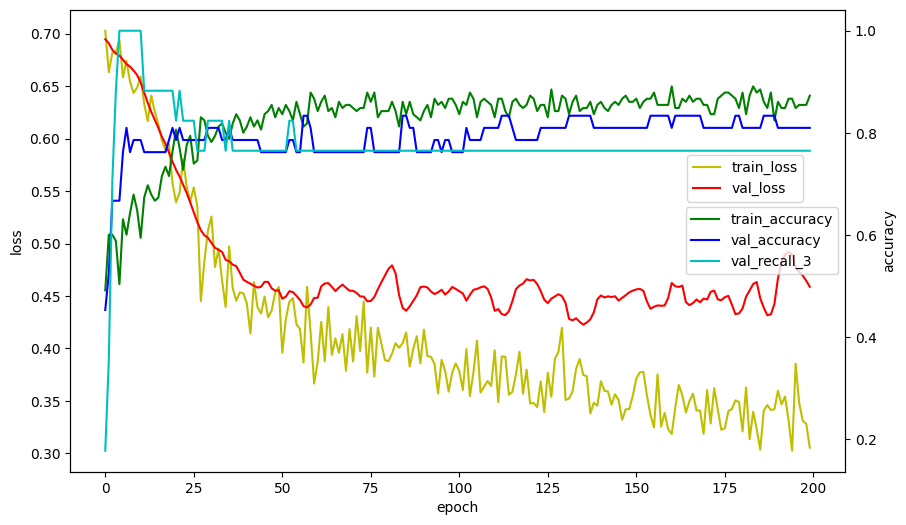

In [85]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
acc_ax.plot(hist.history['val_recall_3'], 'c', label='val_recall_3')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.955, 0.7))
acc_ax.legend(loc='center right')
plt.show()

In [90]:
# 모델평가
score = model.evaluate(x_test, y_test,verbose=0)
print('model loss : ',score[0])
print('model accuracy : ',score[1])
print('model precision :',score[2])
print('model recall :',score[3])

model loss :  0.47111648321151733
model accuracy :  0.8089887499809265
model precision : 0.7857142686843872
model recall : 0.8048780560493469


In [103]:
# 교차표(혼동행렬)
# y_test 실제값
y_hat = (model.predict(x_test) > 0.5).astype(int) 
y_test.shape,y_hat.shape # 실제값(1차원), 예측값(2차원)

3/3 [==============================] - 0s 2ms/step


((89, 1), (89, 1))

In [104]:
ctab = pd.crosstab(y_test,y_hat.reshape(-1))  # y_hat은 2차원이라 rshape으로 1차원으로
ctab.index.name = '실제값'
ctab.columns.name = '예측값'
ctab

pd.crosstab(y_test,             # 실제값
           y_hat.reshape(-1),    # 예측값
           rownames=['실제값'],  # index이름
           colnames=['예측값'])   # columns이름  

ValueError: All arrays must be of the same length

In [105]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_hat) # y_hat.reshape(-1) 둘 다 가능
# 결과가 numpy배열인  혼동행렬

array([[39,  9],
       [ 8, 33]], dtype=int64)

In [ ]:
# 모델 사용

In [97]:
x_test[0]

array([0.58333333, 1.        , 1.        , 0.52830189, 0.34246575,
       0.        , 1.        , 0.3129771 , 1.        , 0.09677419,
       0.5       , 0.33333333, 0.75      ])

In [108]:
# 모델저장
from tensorflow.keras.models import save_model,load_model
model.save('model/07binary.h5')
save_model(model,'model/07binary.h5')

# 분류분석
- X_train, y_train, x_test, y_test를 사용
      -> y_train과 y_test 원핫인코딩

In [107]:
import pandas as pd
import numpy as np
import sys      # 최대정수를 가져오기 위해 import
from tensorflow.keras import utils # utils.to_categorical() : 분류분석시 y 데이터 원핫인코딩  # from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential #모델 생성
from tensorflow.keras.layers import Dense,Input
import matplotlib.pyplot as plt

# 1. 전처리

In [110]:
pd.read_excel('data/heart-disease.xlsx',sheet_name='processed.cleveland')
dataset = df.values
dataset

array([[63.,  1.,  1., ...,  0.,  6.,  0.],
       [67.,  1.,  4., ...,  3.,  3.,  1.],
       [37.,  1.,  3., ...,  0.,  3.,  0.],
       ...,
       [68.,  1.,  4., ...,  2.,  7.,  1.],
       [57.,  1.,  4., ...,  1.,  7.,  1.],
       [57.,  0.,  2., ...,  1.,  3.,  1.]])

In [111]:
df.isin(['?']).sum()

age             0
sex             0
cp              0
treshtbps       0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              0
hsl             0
heartDisease    0
dtype: int64

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 301
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           296 non-null    int64  
 1   sex           296 non-null    int64  
 2   cp            296 non-null    int64  
 3   treshtbps     296 non-null    int64  
 4   chol          296 non-null    float64
 5   fbs           296 non-null    int64  
 6   restecg       296 non-null    int64  
 7   thalach       296 non-null    int64  
 8   exang         296 non-null    int64  
 9   oldpeak       296 non-null    float64
 10  slope         296 non-null    int64  
 11  ca            296 non-null    float64
 12  hsl           296 non-null    float64
 13  heartDisease  296 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 42.8 KB


In [113]:
# target변수의 분포가 균형을 이루는지
df['heartDisease'].value_counts()/df.shape[0]

0    0.540541
1    0.459459
Name: heartDisease, dtype: float64

In [114]:
# 입력(독립)변수와 타겟(종속, 출력) 변수 분리
X = df.iloc[:,:-1].values  # 맨 마지막 열을 제외한 부분을 numpy 배열
y = df.iloc[:,-1:].values   # df.iloc[:,-1].values  => 1차원으로 나옴.. 
                            # => 2차원numpy 배열로 변경 iloc[:,-1:] (train_test_split사용을 위해 2차원으로)
X.shape,y.shape

((296, 13), (296, 1))

In [115]:
X[0]

array([ 63. ,   1. ,   1. , 145. , 233. ,   1. ,   2. , 150. ,   0. ,
         2.3,   3. ,   0. ,   6. ])

In [116]:
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)
scaled_X[0]

array([0.70833333, 1.        , 0.        , 0.48113208, 0.24429224,
       1.        , 1.        , 0.60305344, 0.        , 0.37096774,
       1.        , 0.        , 0.75      ])

In [119]:
# scaled_X,y를 학습데이터셋: 테스트셋 = 7:3 으로 분할  # 층화추출
# 1차 분할: 훈련 70%, 테스트 30%
X_train_val, X_test, y_train_val, y_test = train_test_split(
    scaled_X, y,
    test_size=0.3,
    random_state=7,
    stratify=y)

# 2차 분할: 훈련 데이터를 다시 검증 10%, 실제 훈련 90%로 분할
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val,
    test_size=100/296,  
    random_state=7,
    stratify=y_train_val)

print(X_train.shape, y_train.shape)  
print(X_val.shape, y_val.shape)     
print(X_test.shape, y_test.shape)   

(137, 13) (137, 1)
(70, 13) (70, 1)
(89, 13) (89, 1)


In [120]:
# 분류분석을 위한 타겟(종속)변수의 원핫인코딩
Y_train = utils.to_categorical(y_train)
Y_val   = utils.to_categorical(y_val,2)
Y_test  = utils.to_categorical(y_test)
Y_train.shape,Y_val.shape,Y_test.shape

((137, 2), (70, 2), (89, 2))

In [122]:
print('원 데이터 :\n', y_train[0:3])
print('원핫인코딩데이터 :\n', Y_train[:3])

원 데이터 :
 [[0]
 [1]
 [1]]
원핫인코딩데이터 :
 [[1. 0.]
 [0. 1.]
 [0. 1.]]


## 2. 모델 생성

In [131]:
from tensorflow.keras.layers import Dropout
model = Sequential()
model.add(Dense(units=32, input_dim=13,activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(units=16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=8,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=2,activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 32)                448       
                                                                 
 dropout_15 (Dropout)        (None, 32)                0         
                                                                 
 dense_28 (Dense)            (None, 16)                528       
                                                                 
 dropout_16 (Dropout)        (None, 16)                0         
                                                                 
 dense_29 (Dense)            (None, 8)                 136       
                                                                 
 dropout_17 (Dropout)        (None, 8)                 0         
                                                                 
 dense_30 (Dense)            (None, 2)                

## 3. 학습과정

In [132]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='Nadam',
    metrics=['accuracy'])

## 4. 모델 학습

In [133]:
hist = model.fit(X_train,Y_train,
                epochs=200,
                validation_data=(X_val,Y_val),
                verbose=1)

Epoch 1/200
5/5 [==============================] - 1s 35ms/step - loss: 0.7410 - accuracy: 0.4453 - val_loss: 0.7401 - val_accuracy: 0.3714
Epoch 2/200
5/5 [==============================] - 0s 8ms/step - loss: 0.7409 - accuracy: 0.4818 - val_loss: 0.7287 - val_accuracy: 0.4429
Epoch 3/200
5/5 [==============================] - 0s 8ms/step - loss: 0.7191 - accuracy: 0.4964 - val_loss: 0.7203 - val_accuracy: 0.4571
Epoch 4/200
5/5 [==============================] - 0s 8ms/step - loss: 0.6789 - accuracy: 0.5693 - val_loss: 0.7132 - val_accuracy: 0.4714
Epoch 5/200
5/5 [==============================] - 0s 8ms/step - loss: 0.7003 - accuracy: 0.5547 - val_loss: 0.7050 - val_accuracy: 0.5143
Epoch 6/200
5/5 [==============================] - 0s 8ms/step - loss: 0.6728 - accuracy: 0.5693 - val_loss: 0.6968 - val_accuracy: 0.5143
Epoch 7/200
5/5 [==============================] - 0s 8ms/step - loss: 0.6927 - accuracy: 0.5401 - val_loss: 0.6881 - val_accuracy: 0.5429
Epoch 8/200
5/5 [=========

5/5 [==============================] - 0s 7ms/step - loss: 0.4331 - accuracy: 0.8321 - val_loss: 0.4007 - val_accuracy: 0.8286
Epoch 60/200
5/5 [==============================] - 0s 8ms/step - loss: 0.4099 - accuracy: 0.8467 - val_loss: 0.3993 - val_accuracy: 0.8286
Epoch 61/200
5/5 [==============================] - 0s 7ms/step - loss: 0.4549 - accuracy: 0.8248 - val_loss: 0.3968 - val_accuracy: 0.8286
Epoch 62/200
5/5 [==============================] - 0s 7ms/step - loss: 0.3878 - accuracy: 0.8540 - val_loss: 0.3983 - val_accuracy: 0.8286
Epoch 63/200
5/5 [==============================] - 0s 7ms/step - loss: 0.4398 - accuracy: 0.7883 - val_loss: 0.3978 - val_accuracy: 0.8286
Epoch 64/200
5/5 [==============================] - 0s 7ms/step - loss: 0.3707 - accuracy: 0.8540 - val_loss: 0.3966 - val_accuracy: 0.8429
Epoch 65/200
5/5 [==============================] - 0s 8ms/step - loss: 0.3851 - accuracy: 0.8540 - val_loss: 0.3955 - val_accuracy: 0.8429
Epoch 66/200
5/5 [===============

5/5 [==============================] - 0s 8ms/step - loss: 0.3978 - accuracy: 0.8248 - val_loss: 0.3880 - val_accuracy: 0.8571
Epoch 118/200
5/5 [==============================] - 0s 10ms/step - loss: 0.3833 - accuracy: 0.8686 - val_loss: 0.3901 - val_accuracy: 0.8571
Epoch 119/200
5/5 [==============================] - 0s 8ms/step - loss: 0.3529 - accuracy: 0.8540 - val_loss: 0.3897 - val_accuracy: 0.8571
Epoch 120/200
5/5 [==============================] - 0s 9ms/step - loss: 0.3571 - accuracy: 0.8759 - val_loss: 0.3900 - val_accuracy: 0.8429
Epoch 121/200
5/5 [==============================] - 0s 8ms/step - loss: 0.3753 - accuracy: 0.8613 - val_loss: 0.3902 - val_accuracy: 0.8429
Epoch 122/200
5/5 [==============================] - 0s 8ms/step - loss: 0.3645 - accuracy: 0.8686 - val_loss: 0.3922 - val_accuracy: 0.8429
Epoch 123/200
5/5 [==============================] - 0s 8ms/step - loss: 0.3890 - accuracy: 0.8686 - val_loss: 0.3908 - val_accuracy: 0.8571
Epoch 124/200
5/5 [=======

5/5 [==============================] - 0s 8ms/step - loss: 0.3204 - accuracy: 0.8832 - val_loss: 0.4152 - val_accuracy: 0.8714
Epoch 176/200
5/5 [==============================] - 0s 7ms/step - loss: 0.3123 - accuracy: 0.8832 - val_loss: 0.4140 - val_accuracy: 0.8714
Epoch 177/200
5/5 [==============================] - 0s 8ms/step - loss: 0.3258 - accuracy: 0.8832 - val_loss: 0.4165 - val_accuracy: 0.8714
Epoch 178/200
5/5 [==============================] - 0s 7ms/step - loss: 0.2907 - accuracy: 0.9197 - val_loss: 0.4230 - val_accuracy: 0.8714
Epoch 179/200
5/5 [==============================] - 0s 6ms/step - loss: 0.3471 - accuracy: 0.8613 - val_loss: 0.4238 - val_accuracy: 0.8714
Epoch 180/200
5/5 [==============================] - 0s 7ms/step - loss: 0.3372 - accuracy: 0.8613 - val_loss: 0.4265 - val_accuracy: 0.8714
Epoch 181/200
5/5 [==============================] - 0s 7ms/step - loss: 0.2826 - accuracy: 0.8759 - val_loss: 0.4315 - val_accuracy: 0.8714
Epoch 182/200
5/5 [========

## 5. 모델 평가

In [136]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

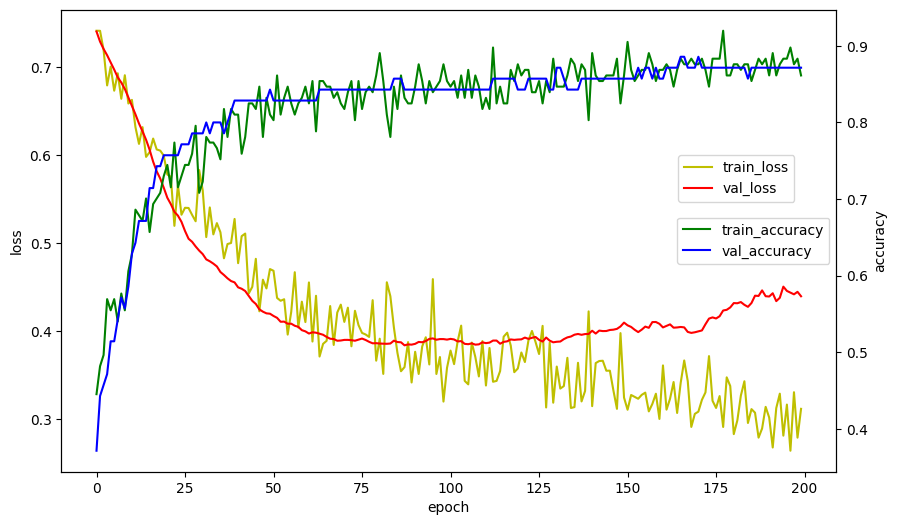

In [137]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.955, 0.7))
acc_ax.legend(loc='center right')
plt.show()

In [138]:
# 모델 평가
model.evaluate(X_test,Y_test)

3/3 [==============================] - 0s 1ms/step - loss: 0.4488 - accuracy: 0.8764


[0.44883257150650024, 0.8764045238494873]

In [139]:
# 혼동행렬, 교차표 ( 원핫인코딩을 다시 복구 )
# y_test 실제값
y_hat = model.predict(X_test).argmax(axis=1)

3/3 [==============================] - 0s 1ms/step


In [140]:
pd.crosstab(y_test,y_hat,rownames=['실제값'],colnames=['예측값'])

AssertionError: arrays and names must have the same length

In [141]:
confusion_matrix(y_test,y_hat)

array([[43,  5],
       [ 6, 35]], dtype=int64)

## 6. 모델 사용하기

In [142]:
X_test[0]

array([0.58333333, 1.        , 1.        , 0.52830189, 0.34246575,
       0.        , 1.        , 0.3129771 , 1.        , 0.09677419,
       0.5       , 0.33333333, 0.75      ])

In [144]:
pred = model.predict(X_test[0].reshape(-1,13))
pred.argmax(axis=1)

1/1 [==============================] - 0s 15ms/step


array([1], dtype=int64)